# FOODS

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow as  tf
import numpy as np
import cv2
import os
from keras.utils import np_utils
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.layers import Conv2D, MaxPooling2D

In [10]:
train = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation = ImageDataGenerator(rescale = 1./255)

In [11]:
train_set=train.flow_from_directory('../input/aifoods/AI(FOODS)/train',target_size = (150,150),batch_size = 12,class_mode = 'categorical')
validation_set=validation.flow_from_directory('../input/aifoods/AI(FOODS)/validation',target_size = (150,150),batch_size = 12,class_mode = 'categorical')   

Found 5664 images belonging to 10 classes.
Found 812 images belonging to 10 classes.


In [12]:
train_set.class_indices

{'Banh beo': 0,
 'Banh bot loc': 1,
 'Banh canh': 2,
 'Banh chung': 3,
 'Banh pia': 4,
 'Banh tet': 5,
 'Bun bo Hue': 6,
 'Bun dau mam tom': 7,
 'Bun thit nuong': 8,
 'Com tam': 9}

In [13]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same',input_shape=(150,150,3)))
model.add(Conv2D(16,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(32,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu',))
model.add(Dense(10,activation='softmax'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 150, 150, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 75, 75, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 37, 37, 64)       

In [15]:
opt = SGD(learning_rate=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [16]:
history = model.fit(train_set,batch_size=128,epochs=30,verbose=1,validation_data=validation_set)

Epoch 1/30
472/472 [==============================] - 168s 355ms/step - loss: 2.2509 - accuracy: 0.1863 - val_loss: 2.2402 - val_accuracy: 0.1884
Epoch 2/30
472/472 [==============================] - 145s 307ms/step - loss: 2.2215 - accuracy: 0.1974 - val_loss: 2.1853 - val_accuracy: 0.2020
Epoch 3/30
472/472 [==============================] - 145s 307ms/step - loss: 2.1573 - accuracy: 0.2302 - val_loss: 2.1186 - val_accuracy: 0.2377
Epoch 4/30
472/472 [==============================] - 145s 306ms/step - loss: 2.1054 - accuracy: 0.2546 - val_loss: 2.0569 - val_accuracy: 0.2746
Epoch 5/30
472/472 [==============================] - 146s 309ms/step - loss: 2.0136 - accuracy: 0.2876 - val_loss: 2.0308 - val_accuracy: 0.2549
Epoch 6/30
472/472 [==============================] - 145s 307ms/step - loss: 1.9470 - accuracy: 0.3201 - val_loss: 1.9238 - val_accuracy: 0.3190
Epoch 7/30
472/472 [==============================] - 145s 308ms/step - loss: 1.8808 - accuracy: 0.3443 - val_loss: 1.8953 -

In [17]:
model.save('./Foods.h5')

In [18]:
model=load_model('./Foods.h5')

In [19]:
score=model.evaluate(validation_set,verbose=1)
print('Sai số: ',score[0])
print('Độ chính xác: ',score[1])

68/68 [==============================] - 14s 208ms/step - loss: 2.1031 - accuracy: 0.5345
Sai số:  2.1031458377838135
Độ chính xác:  0.5344827771186829


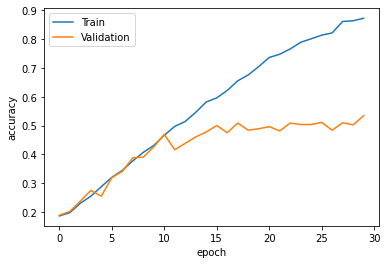

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

Banh Beo


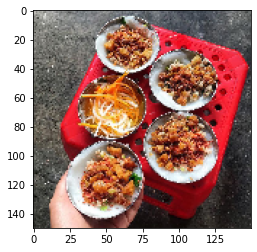

In [25]:
img=load_img("../input/aifoods/AI(FOODS)/test/Banh beo/147.jpg",target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model.predict(img)
if round(result[0][0])==1:
  prediction='Banh Beo'
if round(result[0][1])==1:
  prediction='Banh Bot Loc'
if round(result[0][2])==1:
  prediction='Banh Canh'
if round(result[0][3])==1:
  prediction='Banh Chung'
if round(result[0][4])==1:
  prediction='Banh Pia'
if round(result[0][5])==1:
  prediction='Banh Tet'
if round(result[0][6])==1:
  prediction='Bun Bo Hue'
if round(result[0][7])==1:
  prediction='Bun Dau Mam Tom'
if round(result[0][8])==1:
  prediction='Bun Thit Nuong'
if round(result[0][9])==1:
  prediction='Com Tam'
print(prediction)